# 3_IDA_Exam_Pre_processing_Model_Training_numeric_all

Ab 45 (Model Selection(Training,Tuning and Validate)) springen ,da rest nur preprocessing ist von vorher

Inhalt:

- Data Preprocessing mit numerischer Umwandulung
- kein Feature Selection ( alle Features genutz)
- Train , Tune und Validate Models
- Test Final Model
- EDA der neuen Daten

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [2]:
df= pd.read_csv('einkommen.train', sep=",", na_values = " ?", header=None)

columns = ["Age", "Employment_type", "Interview_dependent_weight", "Education_level", "Schooling/training_period", "Marital_Status", "Employment_area", "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Weekly_working_time", "Country", "Income"]
df.columns = columns

#  Split Data zwischen df_5000 ( mit Income Label) u. df_25000(ohne Income Label)

In [3]:
key = df["Income"].isnull()  #https://stackoverflow.com/questions/36525020/how-to-filter-na-values-and-add-it-to-a-new-dataframe
df_25000 = df.loc[key]
df_5000 = df.loc[~key] # not na value

# Data Pre-Processing

In [4]:
df_copy_new=df.copy()

# Converting features that are Categorial to numeric

In [5]:
# replacing values https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/
labels = df_copy_new["Employment_type"].dropna().unique() #numerische nach was am häufigsten vorkommt Männer 1 udn Frauen 2
df_copy_new['Employment_type'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True) # +1 damit wir letzets Element bekommen

In [6]:
labels = df_copy_new["Education_level"].dropna().unique()
df_copy_new['Education_level'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [7]:
labels = df_copy_new["Marital_Status"].dropna().unique()
df_copy_new['Marital_Status'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [8]:
labels = df_copy_new["Employment_area"].dropna().unique()
df_copy_new['Employment_area'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [9]:
labels = df_copy_new["Partnership"].dropna().unique()
df_copy_new['Partnership'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [10]:
labels = df_copy_new["Ethnicity"].dropna().unique()
df_copy_new['Ethnicity'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [11]:
labels = df_copy_new["Country"].dropna().unique()
df_copy_new['Country'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [12]:
labels = df_copy_new["Gender"].dropna().unique()
df_copy_new['Gender'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [13]:
labels = df_copy_new["Income"].dropna().unique()
df_copy_new['Income'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [14]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         30000 non-null  int64  
 1   Employment_type             28323 non-null  float64
 2   Interview_dependent_weight  30000 non-null  int64  
 3   Education_level             30000 non-null  int64  
 4   Schooling/training_period   30000 non-null  int64  
 5   Marital_Status              30000 non-null  int64  
 6   Employment_area             28318 non-null  float64
 7   Partnership                 30000 non-null  int64  
 8   Ethnicity                   30000 non-null  int64  
 9   Gender                      30000 non-null  int64  
 10  Gains                       30000 non-null  int64  
 11  Losses                      30000 non-null  int64  
 12  Weekly_working_time         30000 non-null  int64  
 13  Country                     294

# Correlations plot nach Umwandlung

<AxesSubplot:>

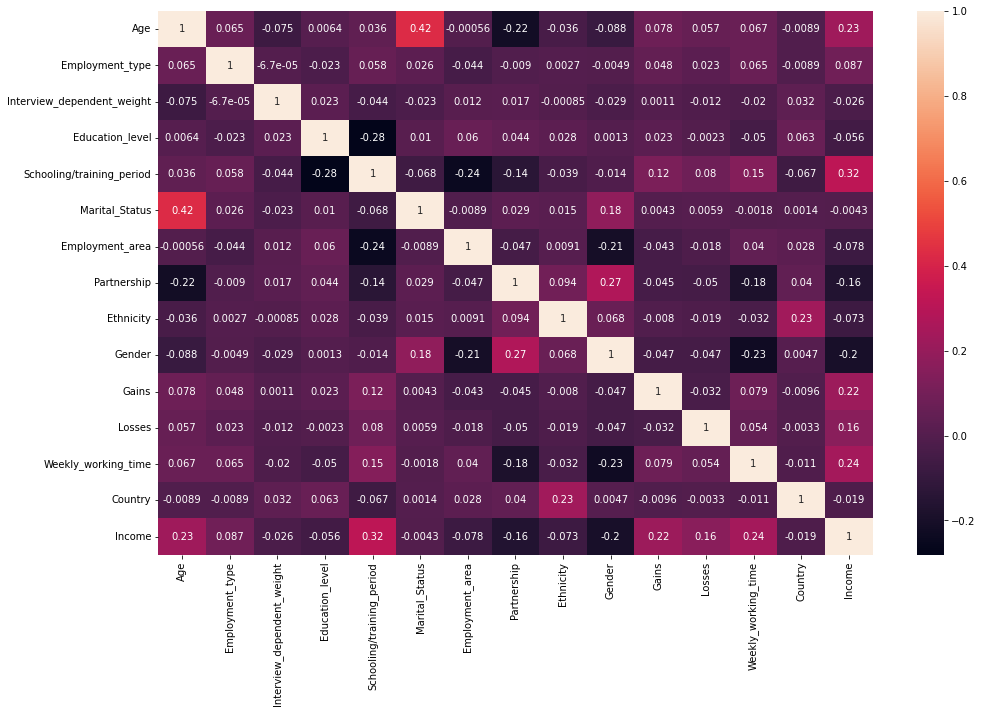

In [15]:
# calculate the correlation matrix
fig = plt.figure(figsize=(16,10))
corr = df_copy_new.corr()

# plot the heatmap
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns)

Man sieht mindestens 1-2 starke korrleationen:
- Age und Marital Status 
- oder Income und Schooling Period
- Je älter man ist desto höher ist die chance das man Heirratet
- bei income trainings period: je mehr Erfahrugn desto mehr Einkommen

# Löschen unwichtiger Features/Spalten

In [16]:
del df_copy_new['Country']

In [17]:
del df_copy_new['Ethnicity']

In [18]:
df_copy_new.shape

(30000, 13)

 - Ich habe mich dafür entschieden das Country gelöscht wird ,da mehr als 90 % aus USA stammt und dies ein Unbalanced feature dann ist und wenn man z.B. die missing values einfüllen will ,mit dem max wären es nochmehr USA
 - Enthnicity wurde gelöscht ,da ICH kein Model erschaffen will, dass etwas classifiziert auf bais von Diskriminung wie der Hautfarbe oder Abstammung 

# Filling Missing Values für  Employment_type und Employment area

In [19]:
df_copy_new['Employment_area'] = df_copy_new['Employment_area'].fillna(df_copy_new['Employment_area'].median())

Die missing Values bei Emplyment_area wurden mit dem Median ersetzte da dei verteilung der Attribute  fast gleich verteilt war weshalb man dafür entscheiden hat
- Mean nicht, da man sonst 4.5 hätte und man nicht sagen kann ob es Klasse 4 oder 5 wäre

In [20]:
# counting unique items
item_counts = df_copy_new["Employment_type"].value_counts()
print(item_counts) #max value nehmen

3.0    20901
2.0     2363
5.0     1928
1.0     1189
6.0     1037
4.0      887
7.0       13
8.0        5
Name: Employment_type, dtype: int64


In [21]:
df_copy_new["Employment_type"]=df_copy_new["Employment_type"].fillna(3.0)

In [22]:
# counting unique items
item_counts = df_copy_new["Employment_type"].value_counts()
print(item_counts) #max value nehmen

3.0    22578
2.0     2363
5.0     1928
1.0     1189
6.0     1037
4.0      887
7.0       13
8.0        5
Name: Employment_type, dtype: int64


Bei Employment-type hat man sich für den Max value also, das Attribut was am häufisgten vor kommt entschieden,da Privat fast 70% vertretten war

In [23]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         30000 non-null  int64  
 1   Employment_type             30000 non-null  float64
 2   Interview_dependent_weight  30000 non-null  int64  
 3   Education_level             30000 non-null  int64  
 4   Schooling/training_period   30000 non-null  int64  
 5   Marital_Status              30000 non-null  int64  
 6   Employment_area             30000 non-null  float64
 7   Partnership                 30000 non-null  int64  
 8   Gender                      30000 non-null  int64  
 9   Gains                       30000 non-null  int64  
 10  Losses                      30000 non-null  int64  
 11  Weekly_working_time         30000 non-null  int64  
 12  Income                      5000 non-null   float64
dtypes: float64(3), int64(10)
memory

# Removing Duplicates

In [24]:
df_copy_new= df_copy_new.drop_duplicates(keep='first') 
#https://blog.hubspot.com/website/duplicated-pandas

In [25]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29981 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         29981 non-null  int64  
 1   Employment_type             29981 non-null  float64
 2   Interview_dependent_weight  29981 non-null  int64  
 3   Education_level             29981 non-null  int64  
 4   Schooling/training_period   29981 non-null  int64  
 5   Marital_Status              29981 non-null  int64  
 6   Employment_area             29981 non-null  float64
 7   Partnership                 29981 non-null  int64  
 8   Gender                      29981 non-null  int64  
 9   Gains                       29981 non-null  int64  
 10  Losses                      29981 non-null  int64  
 11  Weekly_working_time         29981 non-null  int64  
 12  Income                      4999 non-null   float64
dtypes: float64(3), int64(10)
memory

Es wurden Duplicate Gelöscht da die Redudant sein für das Model beim Lernen und training der daten wird schneller und Datenverteilung wird verändert

In [26]:
df_copy_new = df_copy_new.astype('Int64')  

In [27]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29981 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         29981 non-null  Int64
 1   Employment_type             29981 non-null  Int64
 2   Interview_dependent_weight  29981 non-null  Int64
 3   Education_level             29981 non-null  Int64
 4   Schooling/training_period   29981 non-null  Int64
 5   Marital_Status              29981 non-null  Int64
 6   Employment_area             29981 non-null  Int64
 7   Partnership                 29981 non-null  Int64
 8   Gender                      29981 non-null  Int64
 9   Gains                       29981 non-null  Int64
 10  Losses                      29981 non-null  Int64
 11  Weekly_working_time         29981 non-null  Int64
 12  Income                      4999 non-null   Int64
dtypes: Int64(13)
memory usage: 3.6 MB


#  Split Daten worauf man das Model trainieren und testen will (df_5000) und Vorhersage machen will (df_25000) 

In [28]:
key = df_copy_new["Income"].isnull()  #https://stackoverflow.com/questions/36525020/how-to-filter-na-values-and-add-it-to-a-new-dataframe
df_25000 = df_copy_new.loc[key]
df_5000 = df_copy_new.loc[~key] # not na value

In [29]:
label = df_5000['Income']
df_x = df_5000.drop(columns=['Income'])

In [30]:
label=label-1

In [31]:
label.unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [32]:
label=label.astype(bool) 

In [33]:
label

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996     True
4997     True
4998    False
4999    False
Name: Income, Length: 4999, dtype: bool

# Feature Selection durch tree.feature importances

In [34]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_x , label, test_size=.33, random_state=42)

tree = RandomForestClassifier()
tree.fit(X_train, y_train)

importances = tree.feature_importances_

Es wurde einfach die Reihenfolge der Spalten genommen, anhand derer die Daten geteilt werden im Decision tree, da die Algorithmen ja in sich bereits versuchen schritt für schritt die Daten immer homogener aufzuteilen. 
- Ausgabe sind Attribut für DecisionTree, welches die importance ausgibt
- In unseren Fall nutzen wir diese Feature Selection Methode für alle Modele aus um einen einheitlichen vergleich zu bekommen

Feature: 0, Score: 0.15316
Feature: 1, Score: 0.04299
Feature: 2, Score: 0.15615
Feature: 3, Score: 0.03794
Feature: 4, Score: 0.09183
Feature: 5, Score: 0.10902
Feature: 6, Score: 0.07891
Feature: 7, Score: 0.07525
Feature: 8, Score: 0.01665
Feature: 9, Score: 0.11748
Feature: 10, Score: 0.03397
Feature: 11, Score: 0.08664


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

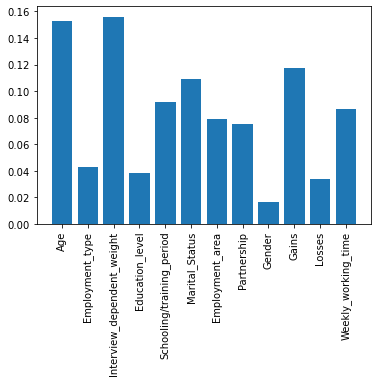

In [36]:
# summarize feature importance
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importances))], importances)
plt.bar(df_x.columns,importances)
plt.xticks(rotation=90)

In [37]:
features_value, features_name = zip(*sorted(zip(importances, df_5000.columns),reverse=True))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

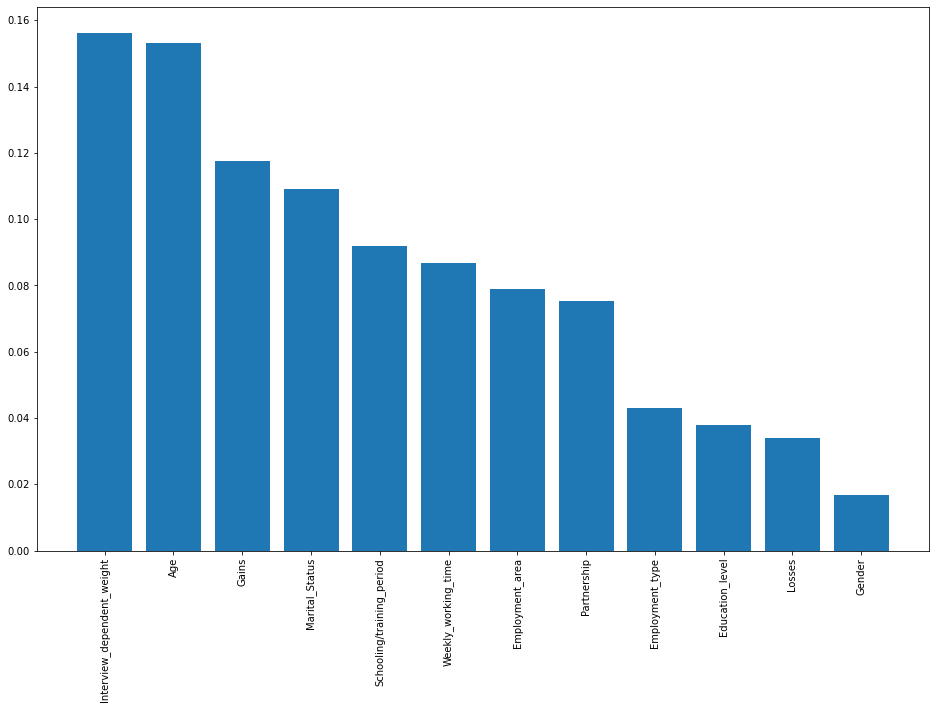

In [38]:
fig = plt.figure(figsize=(16,10))
plt.bar(features_name,features_value)
plt.xticks(rotation=90)

In [39]:
important_features= features_name[:]

In [40]:
important_features

('Interview_dependent_weight',
 'Age',
 'Gains',
 'Marital_Status',
 'Schooling/training_period',
 'Weekly_working_time',
 'Employment_area',
 'Partnership',
 'Employment_type',
 'Education_level',
 'Losses',
 'Gender')

# Splitting data into Train,Validate und Test

In [41]:
df_y=label.astype(int) 
df_y= pd.Series(df_y,name="Income")

df_y.to_frame()

,Income
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,1
4997,1
4998,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.30, random_state=42)

In [43]:
important_features=list(important_features)
print(important_features)
print(type(important_features))

['Interview_dependent_weight', 'Age', 'Gains', 'Marital_Status', 'Schooling/training_period', 'Weekly_working_time', 'Employment_area', 'Partnership', 'Employment_type', 'Education_level', 'Losses', 'Gender']
<class 'list'>


In [44]:
X_train_features = X_train[important_features]

X_valid_features = X_valid[important_features]
X_test_features = X_test[important_features]

# Model Selection(Training,Tuning and Validate)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
import numpy as np
from sklearn.linear_model import RidgeClassifier

# Random Forest

In [46]:
#https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
# prepare the cross-validation procedure
cv = KFold(n_splits=5,)
n_estimators_range= list(range(1, 101)) #107
#max_depth_range=list(range(1,6)) # weniger tiefe weil wie viele Bäume haben  
list_scores = []
list_stds= []
for n in n_estimators_range:
    RFC = RandomForestClassifier(n_estimators=n,max_depth=4, random_state=0)
    scores = cross_val_score(RFC ,X_train_features, y_train, scoring='accuracy', cv=cv)
    print('Train Accuracy:%d %.3f (%.3f)' % (n,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

#print(list_scores)
max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:1 0.792 (0.005)
Train Accuracy:2 0.809 (0.002)
Train Accuracy:3 0.810 (0.008)
Train Accuracy:4 0.815 (0.007)
Train Accuracy:5 0.816 (0.007)
Train Accuracy:6 0.816 (0.005)
Train Accuracy:7 0.816 (0.008)
Train Accuracy:8 0.817 (0.010)
Train Accuracy:9 0.818 (0.009)
Train Accuracy:10 0.821 (0.012)
Train Accuracy:11 0.823 (0.014)
Train Accuracy:12 0.822 (0.013)
Train Accuracy:13 0.821 (0.011)
Train Accuracy:14 0.825 (0.007)
Train Accuracy:15 0.829 (0.007)
Train Accuracy:16 0.829 (0.007)
Train Accuracy:17 0.828 (0.008)
Train Accuracy:18 0.830 (0.006)
Train Accuracy:19 0.830 (0.005)
Train Accuracy:20 0.832 (0.006)
Train Accuracy:21 0.831 (0.004)
Train Accuracy:22 0.832 (0.004)
Train Accuracy:23 0.832 (0.004)
Train Accuracy:24 0.833 (0.004)
Train Accuracy:25 0.830 (0.004)
Train Accuracy:26 0.832 (0.007)
Train Accuracy:27 0.832 (0.006)
Train Accuracy:28 0.833 (0.006)
Train Accuracy:29 0.832 (0.005)
Train Accuracy:30 0.831 (0.006)
Train Accuracy:31 0.833 (0.004)
Train Accuracy:32

Text(0, 0.5, 'Cross-Validated Accuracy')

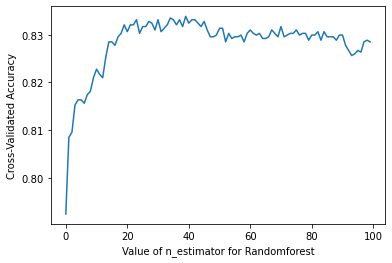

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
 

plt.plot(list(range(100)),list_scores)
plt.xlabel('Value of n_estimator for Randomforest')
plt.ylabel('Cross-Validated Accuracy')

Bester Paramter ist  n_estimator= 40

In [48]:
RFC = RandomForestClassifier(n_estimators=40,max_depth=4, random_state=0)
RFC.fit(X_train_features, y_train)
y_pred = RFC.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.844


In [49]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[885  44]
 [143 128]]

Precision: 0.744
Recall: 0.472
F-1-Score: 0.578


# Decision Tree

In [50]:
max_depth_range=list(range(1,54))  
list_scores = []
list_stds= []
for md in max_depth_range:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=md) 
    scores = cross_val_score(clf_tree ,X_train_features, y_train, scoring='accuracy', cv=cv)
    print('Train Accuracy:%d %.3f (%.3f)' % (md,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:1 0.754 (0.023)
Train Accuracy:2 0.756 (0.022)
Train Accuracy:3 0.795 (0.008)
Train Accuracy:4 0.830 (0.008)
Train Accuracy:5 0.829 (0.008)
Train Accuracy:6 0.827 (0.007)
Train Accuracy:7 0.825 (0.008)
Train Accuracy:8 0.822 (0.011)
Train Accuracy:9 0.816 (0.012)
Train Accuracy:10 0.814 (0.011)
Train Accuracy:11 0.813 (0.015)
Train Accuracy:12 0.813 (0.015)
Train Accuracy:13 0.808 (0.012)
Train Accuracy:14 0.801 (0.013)
Train Accuracy:15 0.800 (0.015)
Train Accuracy:16 0.799 (0.015)
Train Accuracy:17 0.790 (0.020)
Train Accuracy:18 0.790 (0.017)
Train Accuracy:19 0.791 (0.015)
Train Accuracy:20 0.785 (0.010)
Train Accuracy:21 0.792 (0.013)
Train Accuracy:22 0.790 (0.014)
Train Accuracy:23 0.783 (0.012)
Train Accuracy:24 0.787 (0.015)
Train Accuracy:25 0.793 (0.011)
Train Accuracy:26 0.790 (0.014)
Train Accuracy:27 0.781 (0.013)
Train Accuracy:28 0.789 (0.016)
Train Accuracy:29 0.788 (0.010)
Train Accuracy:30 0.787 (0.013)
Train Accuracy:31 0.786 (0.016)
Train Accuracy:32

Text(0, 0.5, 'Cross-Validated Accuracy')

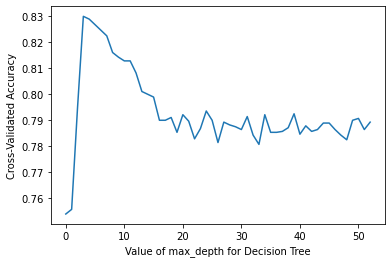

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(list(range(53)),list_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

Bester Parameter ist 4 für max_depth 

In [52]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_tree.fit(X_train_features, y_train)
y_pred = clf_tree.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.845


In [53]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[873  56]
 [130 141]]

Precision: 0.716
Recall: 0.520
F-1-Score: 0.603


# SVM Classifier

In [54]:
#https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
C_range=[100, 10, 1.0, 0.1, 0.001]
list_scores = []
list_stds= []
for c in C_range:
    svc  = make_pipeline(StandardScaler(), SVC(gamma='auto',C=c))
    scores = cross_val_score(svc ,X_train_features, y_train, scoring='accuracy', cv=cv)
    
    print('Train Accuracy:%.3f %.3f (%.3f)' % (c,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:100.000 0.789 (0.018)
Train Accuracy:10.000 0.821 (0.012)
Train Accuracy:1.000 0.821 (0.012)
Train Accuracy:0.100 0.782 (0.013)
Train Accuracy:0.001 0.748 (0.015)
1


Bester Paramter für Regularisierer parameter ist 10

Text(0, 0.5, 'Cross-Validated Accuracy')

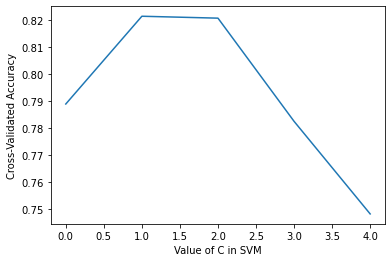

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(list(range(5)),list_scores)
plt.xlabel('Value of C in SVM')
plt.ylabel('Cross-Validated Accuracy')

In [56]:
svc  = make_pipeline(StandardScaler(), SVC(gamma='auto',C=10.0))
svc.fit(X_train_features,y_train)
y_pred = svc .predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.839


In [57]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[860  69]
 [124 147]]

Precision: 0.681
Recall: 0.542
F-1-Score: 0.604


# Logistische Regression

In [58]:
C_range=[100, 10, 1.0, 0.1, 0.001]
list_scores = []
list_stds= []
for c in C_range:
    LoR = LogisticRegression(penalty="l2",C=c)
    scores = cross_val_score(LoR ,X_train_features, y_train, scoring='accuracy', cv=cv)
    
    print('Train Accuracy:%.3f %.3f (%.3f)' % (c,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy:100.000 0.784 (0.011)


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy:10.000 0.784 (0.011)


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy:1.000 0.784 (0.011)


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy:0.100 0.784 (0.011)


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Train Accuracy:0.001 0.783 (0.013)
0


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Cross-Validated Accuracy')

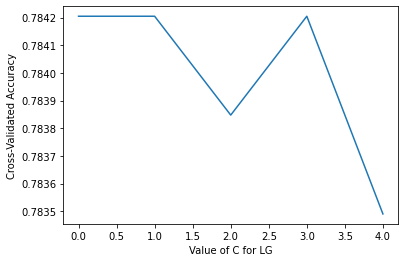

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(list(range(5)),list_scores)
plt.xlabel('Value of C for LG')
plt.ylabel('Cross-Validated Accuracy')

Bester Paramter für den Regularisiere ist 100

In [60]:
LoR = LogisticRegression(penalty="l2",C=0.001)
LoR.fit(X_train_features,y_train)
y_pred = LoR.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.805


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[902  27]
 [207  64]]

Precision: 0.703
Recall: 0.236
F-1-Score: 0.354


# Final Model Testing

Aufgrund der Validation ACC und dem F1 Score wurde entschieden, Decision tree zu wählen

In [66]:
predictions = clf_tree.predict(X_test_features)

In [67]:
acc_score = accuracy_score(y_test,predictions)  
print ("Test Accuracy: %.3f" % (acc_score))
print()
print ("Confusion Matrix: \n " , confusion_matrix(y_test,predictions))
print()
print("Precision: %.3f" % (metrics.precision_score(y_test,predictions)))
print("Recall: %.3f" % (metrics.recall_score(y_test,predictions)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_test,predictions)))

Test Accuracy: 0.850

Confusion Matrix: 
  [[715  40]
 [110 135]]

Precision: 0.771
Recall: 0.551
F-1-Score: 0.643


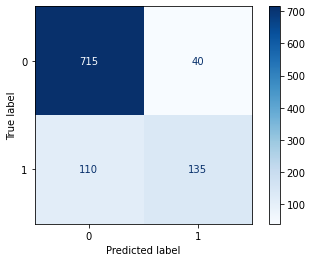

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       755
           1       0.77      0.55      0.64       245

    accuracy                           0.85      1000
   macro avg       0.82      0.75      0.77      1000
weighted avg       0.84      0.85      0.84      1000



In [68]:
#https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(clf_tree, X_test_features, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test,predictions))

# Ploting ROC und berechne AUC

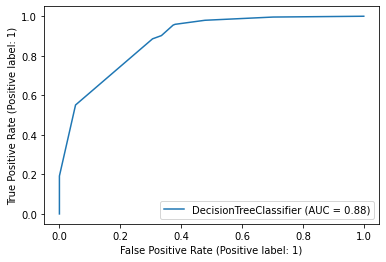

In [71]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(clf_tree, X_test_features, y_test) 

# It tells how much the model is capable of distinguishing between classes.
#Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
#By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

Genau so wie beim Versuch mit Feature Selection

# Vorhersage für die 25000 Samples ohne Income label

In [72]:
X_25000_features = df_25000[important_features]

In [73]:
X_25000_features.shape

(24982, 12)

In [74]:
X_25000_features.head()

,Interview_dependent_weight,Age,Gains,Marital_Status,Schooling/training_period,Weekly_working_time,Employment_area,Partnership,Employment_type,Education_level,Losses,Gender
5000,79627,47,27828,3,15,50,4,1,6,11,0,1
5001,151474,55,0,1,13,38,11,6,3,1,1590,2
5002,132661,26,5013,2,9,40,2,3,3,2,0,2
5003,161674,28,0,1,9,40,10,5,3,2,0,2
5004,62346,36,0,2,9,40,7,2,3,2,0,1


In [75]:
Final_predictions25000 = clf_tree.predict(X_25000_features)

In [76]:
df_Final_predictions25000= pd.DataFrame(Final_predictions25000, columns=['Income'])

In [77]:
df_Final_predictions25000

,Income
0,1
1,0
2,0
3,0
4,0
...,...
24977,0
24978,0
24979,0
24980,0


In [78]:
df_25000['Income'] = df_Final_predictions25000['Income'].values

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_6732/3759895927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_25000['Income'] = df_Final_predictions25000['Income'].values


In [79]:
df_25000['Income']

5000     1
5001     0
5002     0
5003     0
5004     0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: Income, Length: 24982, dtype: int64

In [80]:
df_5000_convert_new=df_5000.replace(1, 0)

In [81]:
df_5000_convert_new=df_5000_convert_new.replace(2, 1)

In [82]:
frames_new = [df_25000,df_5000_convert_new ]

result_new = pd.concat(frames_new)

In [83]:
result_new

,Age,Employment_type,Interview_dependent_weight,Education_level,Schooling/training_period,Marital_Status,Employment_area,Partnership,Gender,Gains,Losses,Weekly_working_time,Income
5000,47,6,79627,11,15,3,4,1,1,27828,0,50,1
5001,55,3,151474,1,13,1,11,6,2,0,1590,38,0
5002,26,3,132661,2,9,2,2,3,2,5013,0,40,0
5003,28,3,161674,2,9,1,10,5,2,0,0,40,0
5004,36,3,62346,2,9,2,7,2,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,3,222971,12,3,0,10,5,1,0,0,40,0
4996,31,3,259425,1,9,1,7,1,0,0,0,40,1
4997,47,6,212120,1,9,1,7,1,0,0,0,40,1
4998,26,3,245880,1,9,0,0,0,0,0,0,60,0


# Koorelationsplot für neuen daten nach prediction

<AxesSubplot:>

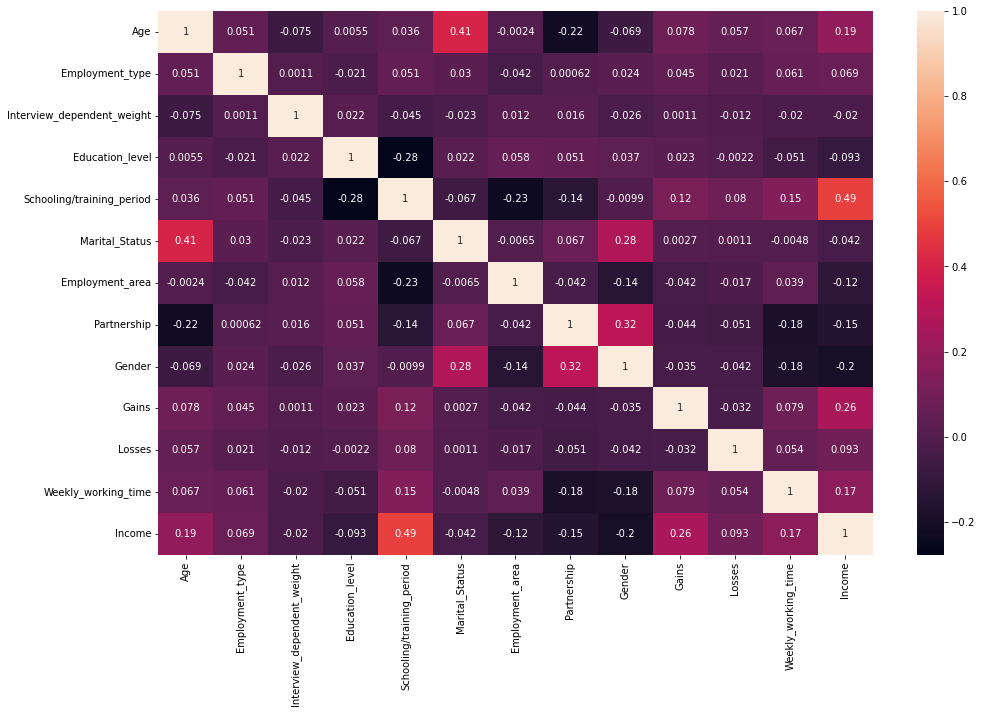

In [84]:
fig = plt.figure(figsize=(16,10))
corr = result_new.corr()

# plot the heatmap
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns)

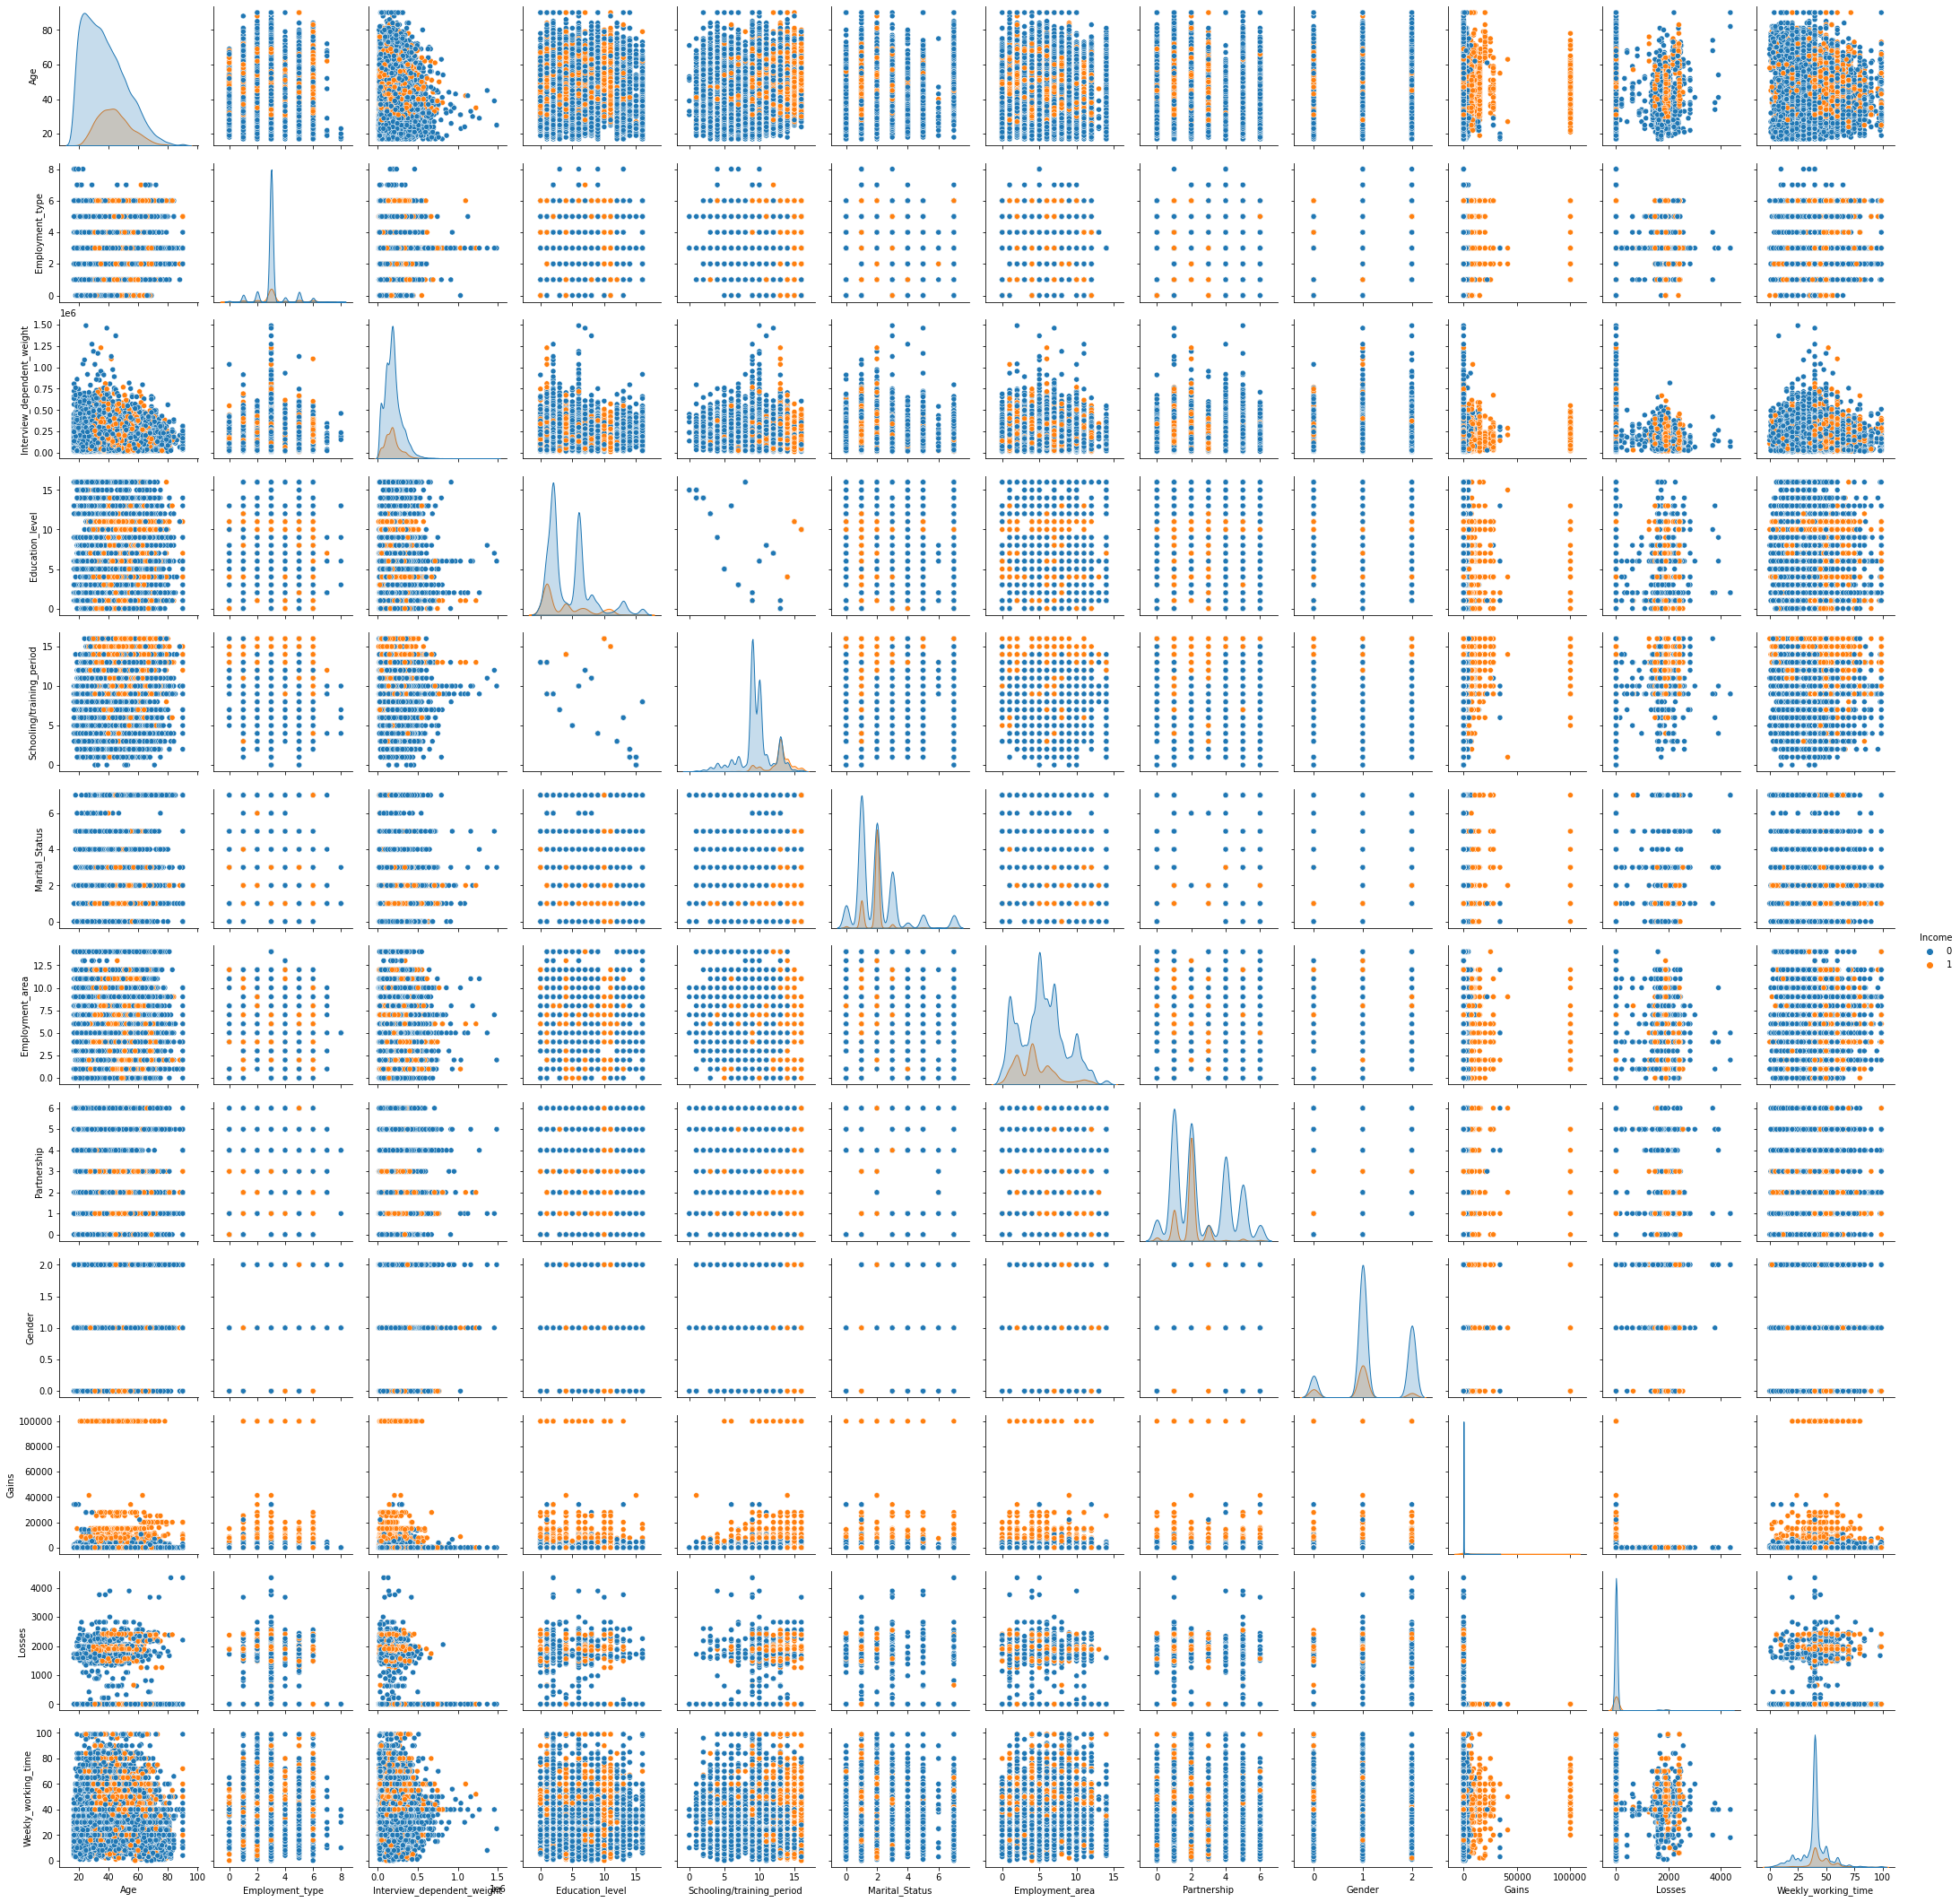

In [85]:
sns.pairplot(result_new,hue="Income")

<AxesSubplot:xlabel='Income', ylabel='count'>

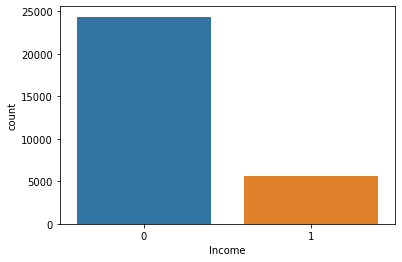

In [86]:
sns.countplot(x="Income",data=result_new)

<AxesSubplot:xlabel='Income', ylabel='count'>

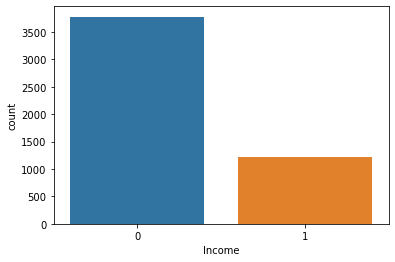

In [87]:
sns.countplot(x="Income",data=df_5000_convert_new)

<AxesSubplot:xlabel='Income', ylabel='count'>

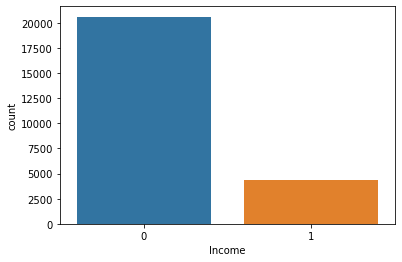

In [88]:
sns.countplot(x="Income",data=df_25000)

In [89]:
print(df_25000["Income"].value_counts())
print(df_5000_convert_new["Income"].value_counts())
print(result_new["Income"].value_counts())

0    20604
1     4378
Name: Income, dtype: int64
0    3778
1    1221
Name: Income, dtype: Int64
0    24382
1     5599
Name: Income, dtype: Int64


In [90]:
print(df_25000["Income"].value_counts()/len(df_25000))
print(df_5000_convert_new["Income"].value_counts()/len(df_5000_convert_new))
print(result_new["Income"].value_counts()/len(result_new))

0    0.824754
1    0.175246
Name: Income, dtype: float64
0    0.755751
1    0.244249
Name: Income, dtype: Float64
0    0.813248
1    0.186752
Name: Income, dtype: Float64


Es wurden 18% der unbekannten Datensatzes hat Incoem label 1, also 4 % weniger als beim Orginal